# Logistic Regression

<span>Logistic Regression is a frequent model and often serves as a basic benchmark for most models. Logistic Regressions use a sigmoid function and 50% threshold to classify the data into classes. We will look at different Logistic Regression models from a few packages.</span>

### Import Preliminaries

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting option
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [3]:
# Import Data
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

wdf = pd.DataFrame(wine.data, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(wine.target, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,1065.000,0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,1050.000,0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,1185.000,0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,1480.000,0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


### Targets

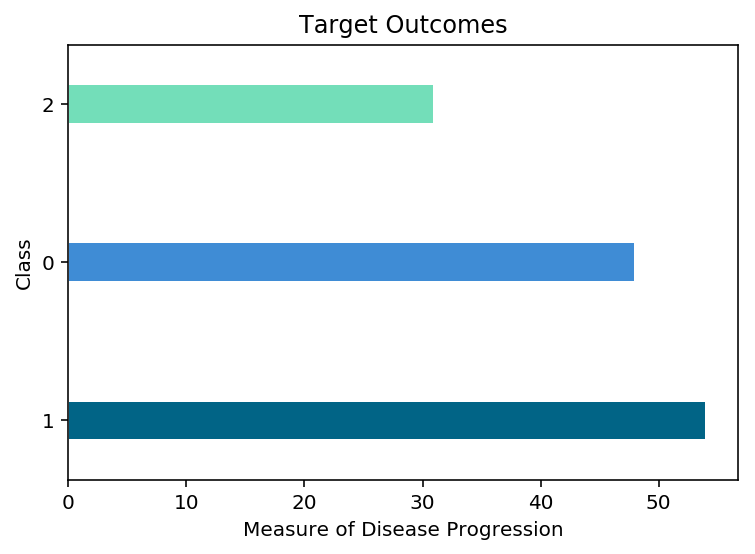

In [4]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#016486','#3F8CD5','#73DEB9'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Class')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [5]:
# Fit the intial logistic model 
lg_model = LogisticRegression(C=10000)
lg_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [6]:
scores = cross_val_score(lg_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.93104


##### Confusion Matrix

In [7]:
# Training Confusion Matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, lg_model.predict(train_x)))
cmatrix.index.name = 'class'
cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction        
                      0   1   2
result class                   
actual 0             48   0   0
       1              0  54   0
       2              0   0  31

##### Parameter Tuning

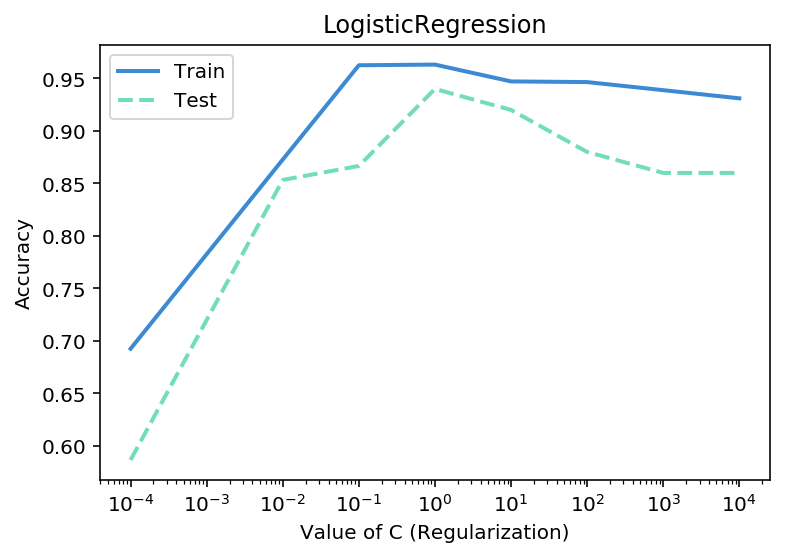

In [8]:
# Define paraameter range and score lists
c_range = [0.0001, 0.01,0.1, 1, 10, 100, 1000, 10000,10000]
train_score = []
test_score = []

# Train a lg_model for every neighbour value in our list
for c in c_range:
    lg_model=LogisticRegression(C = c).fit(train_x,train_y)
    train_score.append(cross_val_score(lg_model, train_x, train_y, cv=10, scoring='accuracy').mean())
    test_score.append(cross_val_score(lg_model, test_x, test_y, cv=10, scoring='accuracy').mean())
                      
# Plot our results
fig, ax = plt.subplots()
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(c_range,train_score,label="Train",linewidth=2, color='#3C8AD4') 
plt.plot(c_range,test_score,label="Test", linewidth=2,linestyle='--', color='#71DEB8')
plt.legend()
plt.title('LogisticRegression')
plt.xlabel('Value of C (Regularization)')
plt.ylabel('Accuracy');
ax.set_xscale('log')

### Final Model

In [9]:
# Fit the intial logistic model 
lg_model = LogisticRegression(C=1)
lg_model.fit(train_x, train_y);
scores = cross_val_score(lg_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.96319


### Predicts Results

In [10]:
# Viwe some predictions
pd.Series(lg_model.predict(test_x)).head(n=7)

0    1
1    1
2    1
3    2
4    1
5    2
6    2
dtype: int64

### General Notes

- linear models for clasification perform better with higher dimensionality
- In Sklearn implementation, the LogisticRegression applies an L2 regularization by default. Modify the C value to reduce the amount of the regularization

Author: Kavi Sekhon